# COVID-19_a9fca423 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

## data sources (acquired reliably from CERN)

```Bash
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6

import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

covid19 = COVID19Py.COVID19(data_source='jhu')
with open(new_filename(), 'wb') as f:
    pickle.dump(covid19, f)

data = covid19.getAll(timelines=True)
   data = covid19.getAll(timelines=True)
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows"   , 500)
pd.set_option("display.max_columns", 500)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    data
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
if 1:
    with open('f94e6997.pkl', 'rb') as f:
        covid19 = pickle.load(f)
    with open('120141ce.pkl', 'rb') as f:
        data = pickle.load(f)

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

CPU times: user 4.34 ms, sys: 98 µs, total: 4.44 ms
Wall time: 4.07 ms


In [5]:
df = pd.DataFrame(data['locations'])
df.head()
#df

,id,country,country_code,country_population,province,last_updated,coordinates,latest,timelines
0,0,Afghanistan,AF,29121286.0,,2020-04-06T07:25:05.647083Z,"{'latitude': '33.0', 'longitude': '65.0'}","{'confirmed': 349, 'deaths': 7, 'recovered': 0}","{'confirmed': {'latest': 349, 'timeline': {'20..."
1,1,Albania,AL,2986952.0,,2020-04-06T07:25:05.650175Z,"{'latitude': '41.1533', 'longitude': '20.1683'}","{'confirmed': 361, 'deaths': 20, 'recovered': 0}","{'confirmed': {'latest': 361, 'timeline': {'20..."
2,2,Algeria,DZ,34586184.0,,2020-04-06T07:25:05.653283Z,"{'latitude': '28.0339', 'longitude': '1.6596'}","{'confirmed': 1320, 'deaths': 152, 'recovered'...","{'confirmed': {'latest': 1320, 'timeline': {'2..."
3,3,Andorra,AD,84000.0,,2020-04-06T07:25:05.656321Z,"{'latitude': '42.5063', 'longitude': '1.5218'}","{'confirmed': 501, 'deaths': 18, 'recovered': 0}","{'confirmed': {'latest': 501, 'timeline': {'20..."
4,4,Angola,AO,13068161.0,,2020-04-06T07:25:05.659357Z,"{'latitude': '-11.2027', 'longitude': '17.8739'}","{'confirmed': 14, 'deaths': 2, 'recovered': 0}","{'confirmed': {'latest': 14, 'timeline': {'202..."


In [6]:
df.query('country in ["United Kingdom"]')

,id,country,country_code,country_population,province,last_updated,coordinates,latest,timelines
217,217,United Kingdom,GB,62348447.0,Bermuda,2020-04-06T07:25:06.356556Z,"{'latitude': '32.3078', 'longitude': '-64.7505'}","{'confirmed': 37, 'deaths': 0, 'recovered': 0}","{'confirmed': {'latest': 37, 'timeline': {'202..."
218,218,United Kingdom,GB,62348447.0,Cayman Islands,2020-04-06T07:25:06.359964Z,"{'latitude': '19.3133', 'longitude': '-81.2546'}","{'confirmed': 35, 'deaths': 1, 'recovered': 0}","{'confirmed': {'latest': 35, 'timeline': {'202..."
219,219,United Kingdom,GB,62348447.0,Channel Islands,2020-04-06T07:25:06.363399Z,"{'latitude': '49.3723', 'longitude': '-2.3644'}","{'confirmed': 309, 'deaths': 6, 'recovered': 0}","{'confirmed': {'latest': 309, 'timeline': {'20..."
220,220,United Kingdom,GB,62348447.0,Gibraltar,2020-04-06T07:25:06.366721Z,"{'latitude': '36.1408', 'longitude': '-5.3536'}","{'confirmed': 103, 'deaths': 0, 'recovered': 0}","{'confirmed': {'latest': 103, 'timeline': {'20..."
221,221,United Kingdom,GB,62348447.0,Isle of Man,2020-04-06T07:25:06.370970Z,"{'latitude': '54.2361', 'longitude': '-4.5481'}","{'confirmed': 127, 'deaths': 1, 'recovered': 0}","{'confirmed': {'latest': 127, 'timeline': {'20..."
222,222,United Kingdom,GB,62348447.0,Montserrat,2020-04-06T07:25:06.374471Z,"{'latitude': '16.7425', 'longitude': '-62.1874'}","{'confirmed': 6, 'deaths': 0, 'recovered': 0}","{'confirmed': {'latest': 6, 'timeline': {'2020..."
223,223,United Kingdom,GB,62348447.0,,2020-04-06T07:25:06.379554Z,"{'latitude': '55.3781', 'longitude': '-3.43600...","{'confirmed': 47806, 'deaths': 4934, 'recovere...","{'confirmed': {'latest': 47806, 'timeline': {'..."
249,249,United Kingdom,GB,62348447.0,Anguilla,2020-04-06T07:25:06.498121Z,"{'latitude': '18.2206', 'longitude': '-63.0686'}","{'confirmed': 3, 'deaths': 0, 'recovered': 0}","{'confirmed': {'latest': 3, 'timeline': {'2020..."
250,250,United Kingdom,GB,62348447.0,British Virgin Islands,2020-04-06T07:25:06.501418Z,"{'latitude': '18.4207', 'longitude': '-64.64'}","{'confirmed': 3, 'deaths': 0, 'recovered': 0}","{'confirmed': {'latest': 3, 'timeline': {'2020..."
251,251,United Kingdom,GB,62348447.0,Turks and Caicos Islands,2020-04-06T07:25:06.505777Z,"{'latitude': '21.69400000000001', 'longitude':...","{'confirmed': 5, 'deaths': 1, 'recovered': 0}","{'confirmed': {'latest': 5, 'timeline': {'2020..."


In [7]:
df.query('country in ["United Kingdom"] and province == ""')

,id,country,country_code,country_population,province,last_updated,coordinates,latest,timelines
223,223,United Kingdom,GB,62348447.0,,2020-04-06T07:25:06.379554Z,"{'latitude': '55.3781', 'longitude': '-3.43600...","{'confirmed': 47806, 'deaths': 4934, 'recovere...","{'confirmed': {'latest': 47806, 'timeline': {'..."


---

In [8]:
locations = {}

# South Korea

In [9]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = location['timelines'].values[0]

confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

# merge
location = confirmed
location['deaths']       = deaths['deaths']
location['recovered']    = recovered['recovered']
locations[location_name] = location
location.tail()

,confirmed,deaths,recovered
datetime,,,
2020-04-01 00:00:00+00:00,9887,165,NaN
2020-04-02 00:00:00+00:00,9976,169,NaN
2020-04-03 00:00:00+00:00,10062,174,NaN
2020-04-04 00:00:00+00:00,10156,177,NaN
2020-04-05 00:00:00+00:00,10237,183,NaN


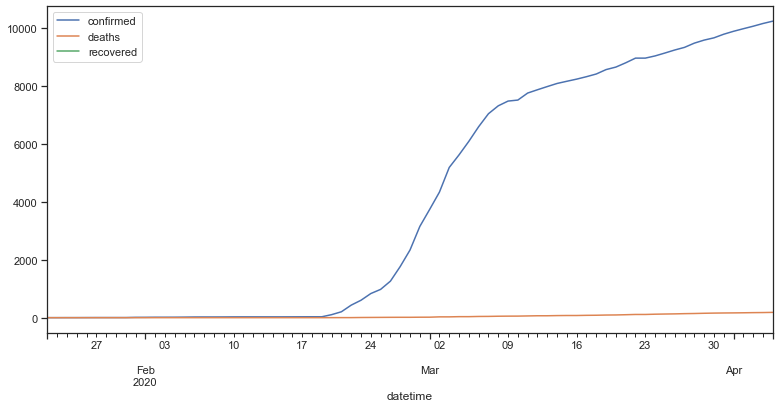

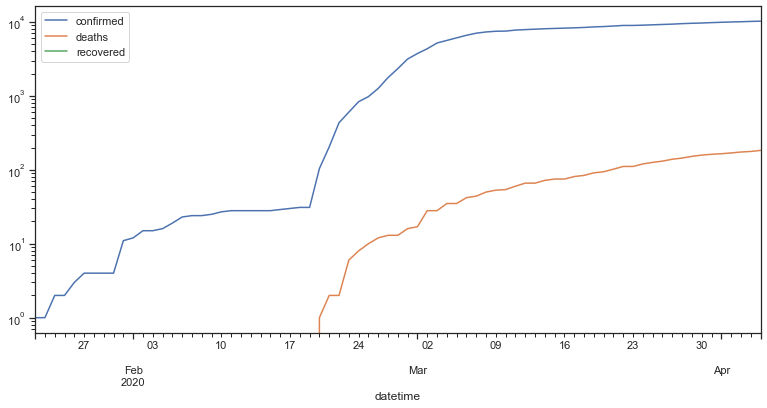

In [10]:
location.plot();
location.plot(logy=True);

# Ireland

In [11]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = location['timelines'].values[0] # dictionary

confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

# merge
location = confirmed
location['deaths']       = deaths['deaths']
location['recovered']    = recovered['recovered']
locations[location_name] = location
location.tail()

,confirmed,deaths,recovered
datetime,,,
2020-04-01 00:00:00+00:00,3447,85,NaN
2020-04-02 00:00:00+00:00,3849,98,NaN
2020-04-03 00:00:00+00:00,4273,120,NaN
2020-04-04 00:00:00+00:00,4604,137,NaN
2020-04-05 00:00:00+00:00,4994,158,NaN


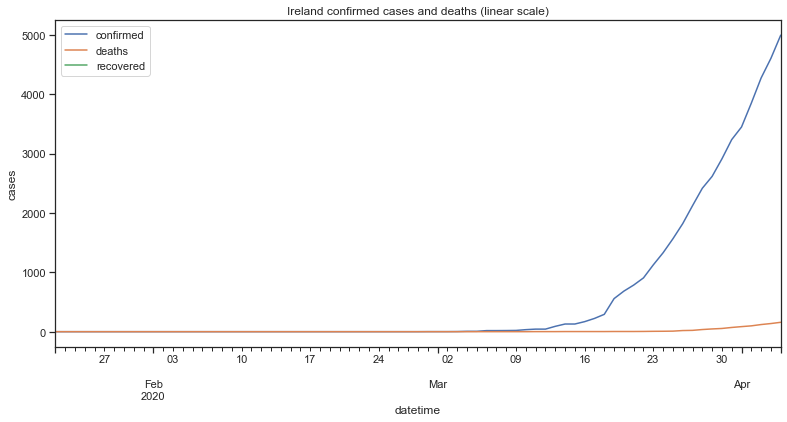

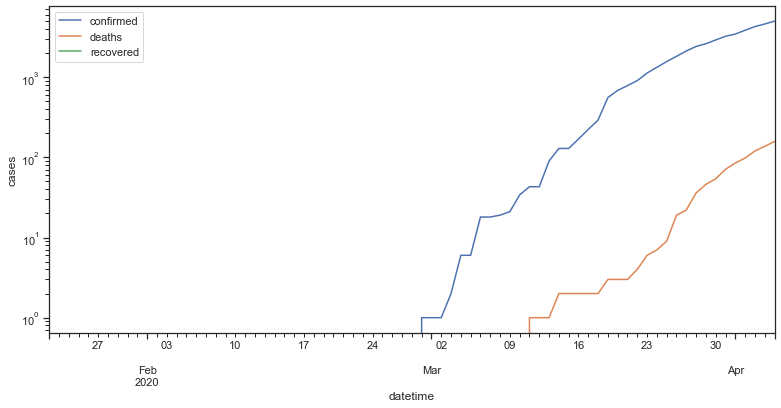

In [12]:
location.plot(title=location_name+' confirmed cases and deaths (linear scale)'); plt.ylabel('cases');
location.plot(logy=True); plt.ylabel('cases');

# United Kingdom (approximate)

In [13]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = location['timelines'].values[0] # dictionary

confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

# merge
location = confirmed
location['deaths']       = deaths['deaths']
location['recovered']    = recovered['recovered']
locations[location_name] = location
location.tail()

,confirmed,deaths,recovered
datetime,,,
2020-04-01 00:00:00+00:00,29474,2352,NaN
2020-04-02 00:00:00+00:00,33718,2921,NaN
2020-04-03 00:00:00+00:00,38168,3605,NaN
2020-04-04 00:00:00+00:00,41903,4313,NaN
2020-04-05 00:00:00+00:00,47806,4934,NaN


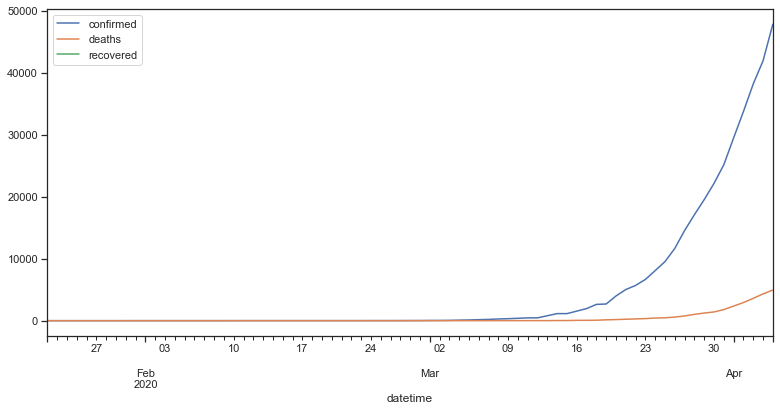

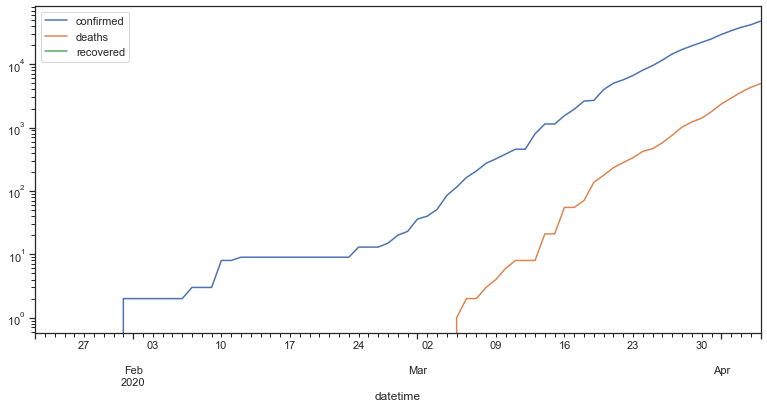

In [14]:
location.plot();
location.plot(logy=True);

# Germany

In [15]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = location['timelines'].values[0] # dictionary

confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

# merge
location = confirmed
location['deaths']       = deaths['deaths']
location['recovered']    = recovered['recovered']
locations[location_name] = location
location.tail()

,confirmed,deaths,recovered
datetime,,,
2020-04-01 00:00:00+00:00,77872,920,NaN
2020-04-02 00:00:00+00:00,84794,1107,NaN
2020-04-03 00:00:00+00:00,91159,1275,NaN
2020-04-04 00:00:00+00:00,96092,1444,NaN
2020-04-05 00:00:00+00:00,100123,1584,NaN


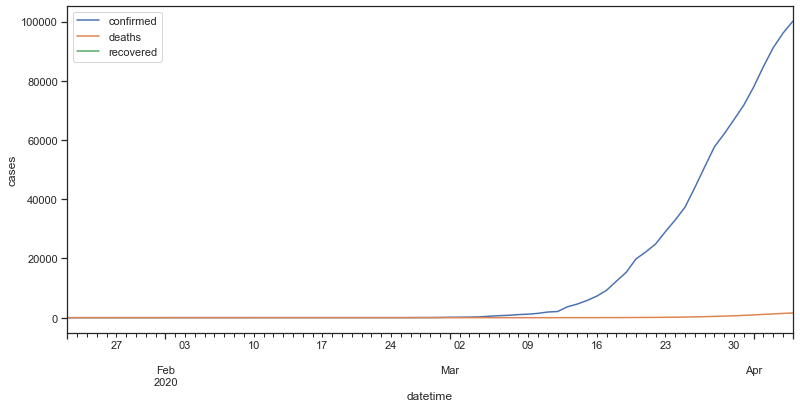

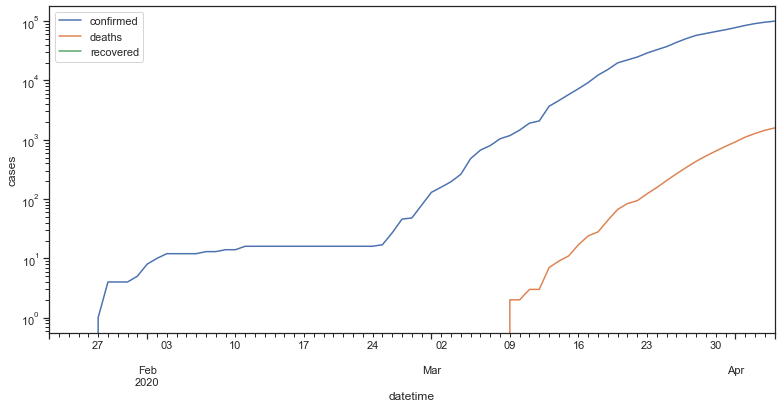

In [16]:
location.plot(); plt.ylabel('cases');
location.plot(logy=True); plt.ylabel('cases');

In [17]:
South_Korea    = locations['Korea, South']
Ireland        = locations['Ireland']
United_Kingdom = locations['United Kingdom']
locations_list = [South_Korea, Ireland, United_Kingdom]

In [18]:
_df = pd.merge(South_Korea.add_suffix('_South_Korea'), Ireland.add_suffix('_Ireland'), how='inner', left_index=True, right_index=True)
_df = pd.merge(_df, United_Kingdom.add_suffix('_United_Kingdom'), how='inner', left_index=True, right_index=True)
_df.tail()

,confirmed_South_Korea,deaths_South_Korea,recovered_South_Korea,confirmed_Ireland,deaths_Ireland,recovered_Ireland,confirmed_United_Kingdom,deaths_United_Kingdom,recovered_United_Kingdom
datetime,,,,,,,,,
2020-04-01 00:00:00+00:00,9887,165,NaN,3447,85,NaN,29474,2352,NaN
2020-04-02 00:00:00+00:00,9976,169,NaN,3849,98,NaN,33718,2921,NaN
2020-04-03 00:00:00+00:00,10062,174,NaN,4273,120,NaN,38168,3605,NaN
2020-04-04 00:00:00+00:00,10156,177,NaN,4604,137,NaN,41903,4313,NaN
2020-04-05 00:00:00+00:00,10237,183,NaN,4994,158,NaN,47806,4934,NaN
